<a href="https://colab.research.google.com/github/jayuan101/Airline_Predication/blob/main/Airline_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
pd.options.display.float_format = '{:.0f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score
import datetime
import time
from time import strftime, gmtime


import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_flights=pd.read_csv("/content/flights.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [5]:
# converting input time value to datetime.
def conv_time(time_val):
    if pd.isnull(time_val):
        return np.nan
    else:
            # replace 24:00 o'clock with 00:00 o'clock:
        if time_val == 2400: time_val = 0
            # creating a 4 digit value out of input value:
        time_val = "{0:04d}".format(int(time_val))
            # creating a time datatype out of input value: 
        time_formatted = datetime.time(int(time_val[0:2]), int(time_val[2:4]))
    return time_formatted

In [6]:
df_flights['ARRIVAL_TIME'] = df_flights['ARRIVAL_TIME'].apply(conv_time)
df_flights['DEPARTURE_TIME'] = df_flights['DEPARTURE_TIME'].apply(conv_time)
df_flights['SCHEDULED_DEPARTURE'] = df_flights['SCHEDULED_DEPARTURE'].apply(conv_time)
df_flights['WHEELS_OFF'] = df_flights['WHEELS_OFF'].apply(conv_time)
df_flights['WHEELS_ON'] = df_flights['WHEELS_ON'].apply(conv_time)
df_flights['SCHEDULED_ARRIVAL'] = df_flights['SCHEDULED_ARRIVAL'].apply(conv_time)

In [7]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
df_flights['AIRLINE_DELAY'] = df_flights['AIRLINE_DELAY'].fillna(0)
df_flights['AIR_SYSTEM_DELAY'] = df_flights['AIR_SYSTEM_DELAY'].fillna(0)
df_flights['SECURITY_DELAY'] = df_flights['SECURITY_DELAY'].fillna(0)
df_flights['LATE_AIRCRAFT_DELAY'] = df_flights['LATE_AIRCRAFT_DELAY'].fillna(0)
df_flights['WEATHER_DELAY'] = df_flights['WEATHER_DELAY'].fillna(0)

In [9]:
# group by CANCELLATION_REASON to see the ration
df_flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [10]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY             0
SECURITY_DELAY               0
AIRLINE_DELAY                0
LATE_AIRCRAFT_DELAY          0
WEATHER_DELAY                0
dtype: int64

In [11]:
# group by CANCELLATION_REASON to see the ration
df_flights['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

In [12]:
# -------------------------------------
# converting categoric value to numeric
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 1
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 2
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 3
df_flights.loc[df_flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 4

# -----------------------------------
# converting NaN data to numeric zero
df_flights['CANCELLATION_REASON'] = df_flights['CANCELLATION_REASON'].fillna(0)

In [13]:
df_flights.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER             14721
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME          86153
DEPARTURE_DELAY         86153
TAXI_OUT                89047
WHEELS_OFF              89047
SCHEDULED_TIME              6
ELAPSED_TIME           105071
AIR_TIME               105071
DISTANCE                    0
WHEELS_ON               92513
TAXI_IN                 92513
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME            92513
ARRIVAL_DELAY          105071
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON         0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

In [14]:
# drop the last 1% of missing data rows.
df_flights = df_flights.dropna(axis=0)

In [15]:
df_flights.isnull().sum()


YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
CANCELLATION_REASON    0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [16]:
df_airlines = pd.read_csv('/content/airlines.csv')
df_airlines

,IATA_CODE,AIRLINE
0,UA,UnitedAirLinesInc.
1,AA,AmericanAirlinesInc.
2,F9,FrontierAirlinesInc.
3,B6,JetBlueAirways
4,AS,AlaskaAirlinesInc.
5,NK,SpiritAirLines
6,WN,SouthwestAirlinesCo.
7,DL,DeltaAirLinesInc.
8,HA,HawaiianAirlinesInc.


In [17]:
# joining airlines
df_flights = df_flights.merge(df_airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [18]:
# dropping old column and rename new one
df_flights = df_flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
df_flights = df_flights.rename(columns={"AIRLINE_y":"AIRLINE"})

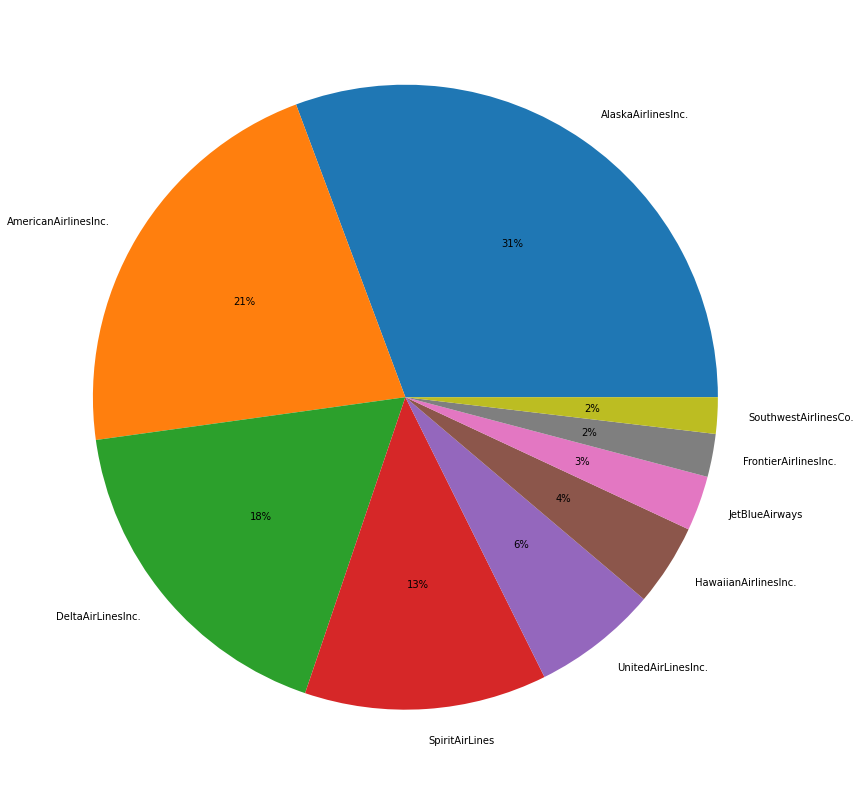

In [19]:
fig_dim = (14,18)
f, ax = plt.subplots(figsize=fig_dim)
quality=df_flights["AIRLINE"].unique()
size=df_flights["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

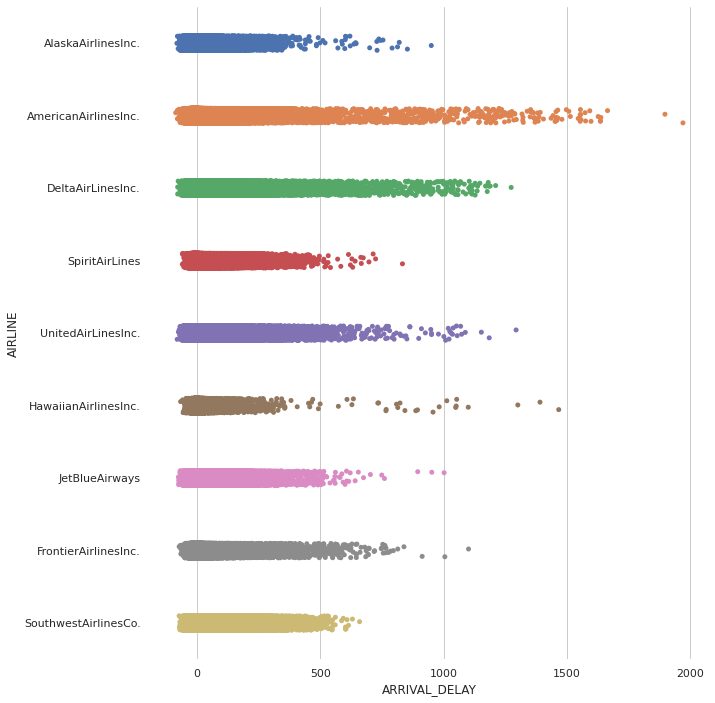

In [20]:
sns.set(style="whitegrid")

# initialize the figure
fig_dim = (10,12)
f, ax = plt.subplots(figsize=fig_dim)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=df_flights, dodge=True, jitter=True
            )
plt.show()

In [21]:
# Group by airline and sum up / count the values
df_flights_grouped_sum = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
df_flights_grouped_cnt = df_flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('count').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_CNT"})

# Merge the two groups together
df_flights_grouped_delay = df_flights_grouped_sum.merge(df_flights_grouped_cnt, left_on='AIRLINE', right_on='AIRLINE', how='inner')
# Calculate the average delay per airline
df_flights_grouped_delay.loc[:,'AVG_DELAY_AIRLINE'] = df_flights_grouped_delay['ARRIVAL_DELAY_SUM'] / df_flights_grouped_delay['ARRIVAL_DELAY_CNT']

df_flights_grouped_delay.sort_values('ARRIVAL_DELAY_SUM', ascending=False)

,AIRLINE,ARRIVAL_DELAY_SUM,ARRIVAL_DELAY_CNT,AVG_DELAY_AIRLINE
6,SouthwestAirlinesCo.,5435468,1242403,4
8,UnitedAirLinesInc.,2757957,507762,5
1,AmericanAirlinesInc.,2460604,712935,3
5,JetBlueAirways,1749880,262042,7
7,SpiritAirLines,1667050,115193,14
3,FrontierAirlinesInc.,1126549,90090,13
2,DeltaAirLinesInc.,162527,870275,0
4,HawaiianAirlinesInc.,153838,76041,2
0,AlaskaAirlinesInc.,-167421,171439,-1


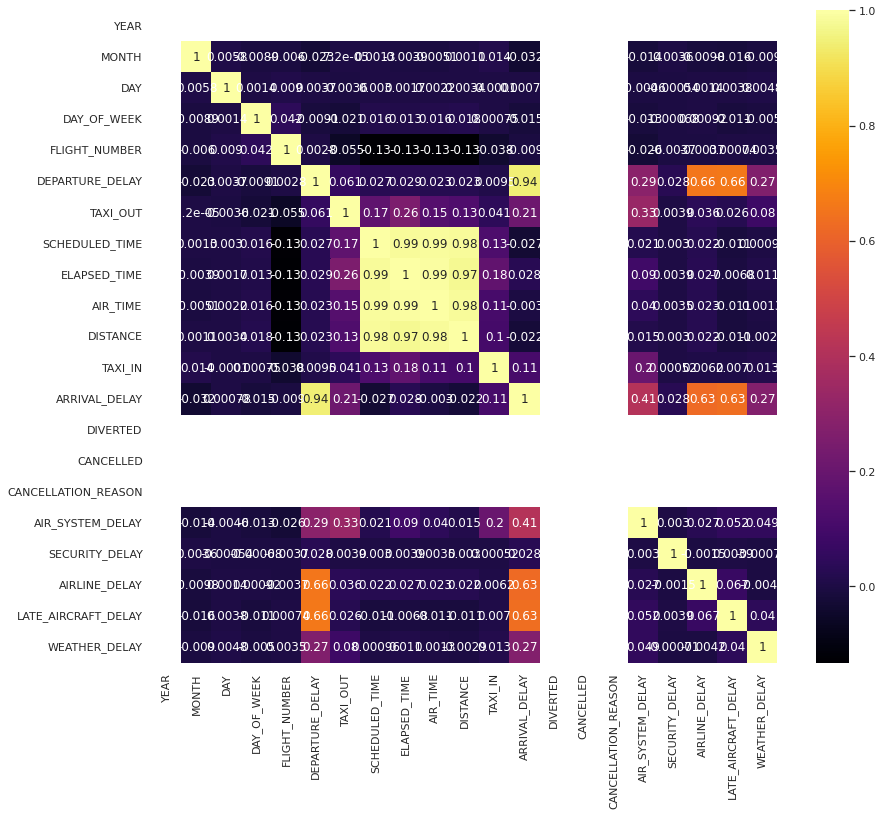

In [22]:
# Dataframe correlation
del_corr = df_flights.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

In [23]:
# Marking the delayed flights
df_flights['DELAYED'] = df_flights.loc[:,'ARRIVAL_DELAY'].values > 0

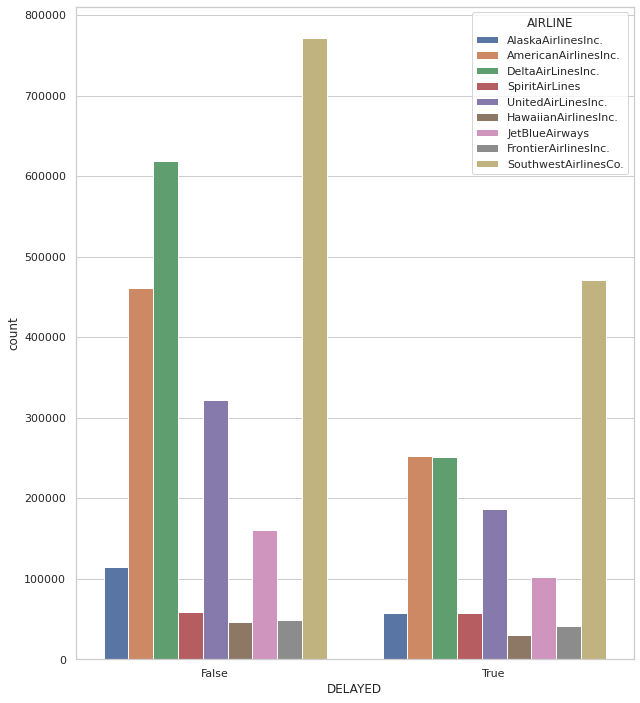

In [24]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAYED',hue='AIRLINE',data=df_flights)
plt.show()

In [25]:
# Label definition
y = df_flights.DELAYED

# Choosing the predictors
feature_list_s = [
    'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME']

# New dataframe based on a small feature list
X_small = df_flights[feature_list_s]

In [26]:
# RandomForestClassifier with 10 trees and fitted on the small feature set 
clf = RandomForestClassifier(n_estimators = 10, random_state=5)
clf.fit(X_small, y)

RandomForestClassifier(n_estimators=10, random_state=5)

In [27]:
importances=clf.feature_importances_
importances=pd.DataFrame([X_small.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,LATE_AIRCRAFT_DELAY,0
1,AIRLINE_DELAY,0
2,AIR_SYSTEM_DELAY,0
3,WEATHER_DELAY,0
4,ELAPSED_TIME,0


In [28]:
# choosing the predictors
feature_list = [
    'YEAR'
    ,'MONTH'
    ,'DAY'
    ,'LATE_AIRCRAFT_DELAY'
    ,'AIRLINE_DELAY'
    ,'AIR_SYSTEM_DELAY'
    ,'WEATHER_DELAY'
    ,'ELAPSED_TIME'
    ,'DEPARTURE_DELAY'
    ,'SCHEDULED_TIME'
    ,'AIR_TIME'
    ,'DISTANCE'
    ,'TAXI_IN'
    ,'TAXI_OUT'
    ,'DAY_OF_WEEK'
    ,'SECURITY_DELAY'
]
# Any number can be used in place of '0'. 
import random
random.seed(0)
    
df_flights_1=df_flights.sample(n=20000)
X = df_flights_1[feature_list]

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1326303 to 2227693
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 20000 non-null  int64  
 1   MONTH                20000 non-null  int64  
 2   DAY                  20000 non-null  int64  
 3   LATE_AIRCRAFT_DELAY  20000 non-null  float64
 4   AIRLINE_DELAY        20000 non-null  float64
 5   AIR_SYSTEM_DELAY     20000 non-null  float64
 6   WEATHER_DELAY        20000 non-null  float64
 7   ELAPSED_TIME         20000 non-null  float64
 8   DEPARTURE_DELAY      20000 non-null  float64
 9   SCHEDULED_TIME       20000 non-null  float64
 10  AIR_TIME             20000 non-null  float64
 11  DISTANCE             20000 non-null  int64  
 12  TAXI_IN              20000 non-null  float64
 13  TAXI_OUT             20000 non-null  float64
 14  DAY_OF_WEEK          20000 non-null  int64  
 15  SECURITY_DELAY       20000 n

In [30]:
y = df_flights_1.DELAYED

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import scale
X_train=scale(X_train)
X_test=scale(X_test)

In [32]:
model=LinearRegression()
model=model.fit(X_train,y_train)
slope=model.coef_
coef=model.intercept_
print(slope.flatten())
print(coef)

[ 0.00000000e+00 -7.89981956e-03 -2.81869591e-03 -5.94679249e-01
 -7.34038927e-01 -3.93709987e-01 -2.95212919e-01  1.11443563e+00
  1.26954342e+00 -2.20454288e+00  1.12317215e+00 -7.45910473e-02
  1.05846162e-01  1.67192234e-01  1.64503394e-03 -3.14008086e-02]
0.3590624999999999


In [33]:
y_pred=model.predict(X_train)

In [34]:
r2_score(y_train,y_pred)

0.5906983125232703

In [35]:
pip install mlxtend==0.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

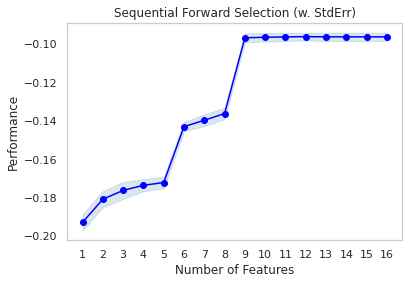

In [37]:
lr = LinearRegression()
sfs = SFS(lr, k_features='best', forward=True, floating=False, 
          scoring='neg_mean_squared_error', cv=10)
model = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [38]:
print('Selected features:', sfs.k_feature_idx_)

Selected features: (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15)


In [39]:
from sklearn import ensemble,gaussian_process,linear_model,naive_bayes,neighbors,svm,tree

In [40]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),
    #Nearest Neighbor
    neighbors.KNeighborsRegressor(),
    #Trees    
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor()
    ]

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score,precision_score,recall_score,auc

In [42]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
results=[]

row_index = 0
for alg in MLA:
    
    cv_results = cross_val_score(alg, X_train, y_train, cv=10)
    results.append(cv_results)
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)
    
    
    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA AUC
4,RandomForestRegressor,1,1,1
1,BaggingRegressor,1,1,1
2,ExtraTreesRegressor,1,1,1
3,GradientBoostingRegressor,1,1,1
0,AdaBoostRegressor,1,1,1
6,DecisionTreeRegressor,1,0,1
5,KNeighborsRegressor,1,0,1
7,ExtraTreeRegressor,1,0,1


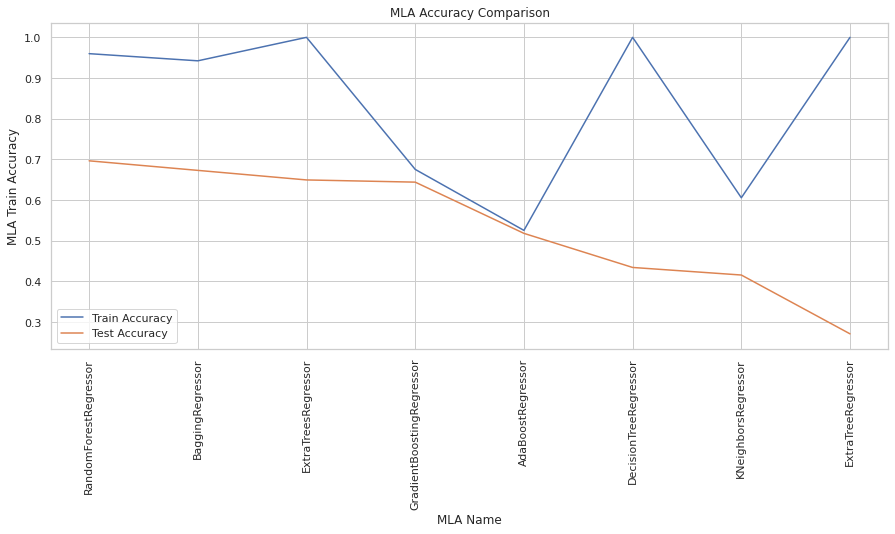

In [43]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

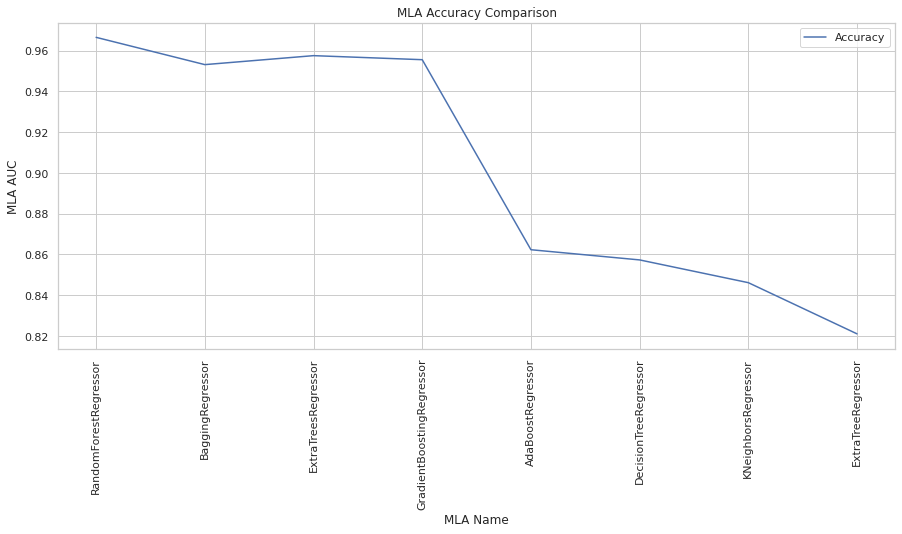

In [44]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',label='Accuracy')

plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.legend()
plt.show()

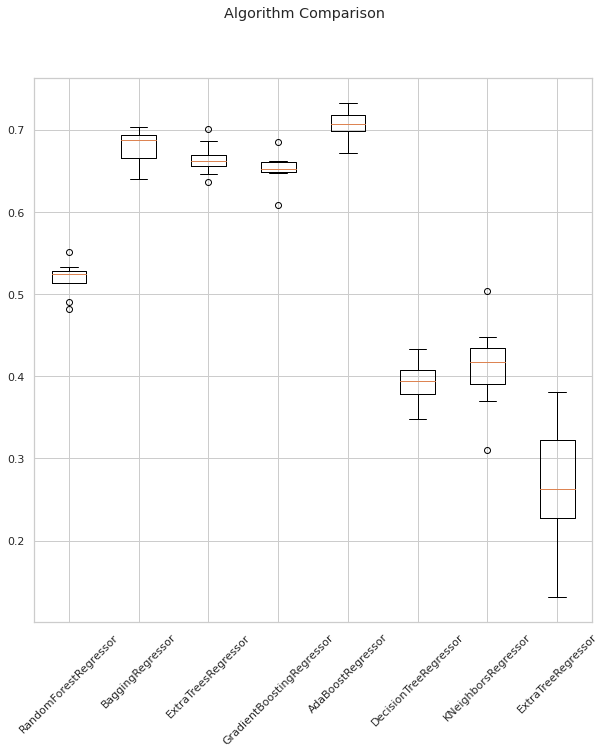

In [45]:
#sns.boxplot(MLA_compare["MLA AUC"])# boxplot algorithm comparison
fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,labels=MLA_compare['MLA Name'])
plt.xticks(rotation=45)
plt.show()

In [46]:
# RandomForest with 100 trees
forest_model = RandomForestRegressor(n_estimators = 100, random_state=42)

In [47]:
y = df_flights_1.ARRIVAL_DELAY
y = np.array(y)

In [48]:
X = np.array(X)

In [49]:
# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [50]:
#The Shape of Train- and Testdata
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', val_X.shape)
print('Testing Labels Shape:', val_y.shape)

Training Features Shape: (14000, 16)
Training Labels Shape: (14000,)
Testing Features Shape: (6000, 16)
Testing Labels Shape: (6000,)


In [51]:
# Average arrival delay for our dataset
baseline_preds = df_flights['ARRIVAL_DELAY'].agg('sum') / df_flights['ARRIVAL_DELAY'].agg('count') 

# Baseline error by average arrival delay 
baseline_errors = abs(baseline_preds - val_y)
print('Average baseline error: ', round(np.mean(baseline_errors),2))

Average baseline error:  21.09


In [52]:
# Fit the model
forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=42)

In [53]:
# Predict the target based on testdata 
flightdelay_pred= forest_model.predict(val_X)

In [54]:
#Calculate the absolute errors
errors_random1 = abs(flightdelay_pred - val_y)

In [55]:
print('Mean Absolute Error: ', round(np.mean(errors_random1),3), 'minutes.')

Mean Absolute Error:  2.767 minutes.


In [56]:
X=pd.DataFrame(X)

In [57]:
importances=forest_model.feature_importances_
importances=pd.DataFrame([X.columns,importances]).transpose()
importances.columns=[['Variables','Importance']]
importances

,Variables,Importance
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [58]:
# Count of DEPARTURE_DELAYs that are not zero and could influence our prediction.
print("DEPARTURE_DELAY count: ")
print(df_flights_1[df_flights_1['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("All datarow count:")
print((df_flights_1)['DEPARTURE_DELAY'].count())
print("-------------------------------")
print("-------------------------------")
print("Percentag of DEPARTURE_DELAY that is not zero:")
print(df_flights_1[df_flights_1['DEPARTURE_DELAY'] != 0]['DEPARTURE_DELAY'].count() / df_flights_1['DEPARTURE_DELAY'].count())

DEPARTURE_DELAY count: 
18759
-------------------------------
All datarow count:
20000
-------------------------------
-------------------------------
Percentag of DEPARTURE_DELAY that is not zero:
0.93795


In [59]:
print("----------------- TRAINING ------------------------")
print("r-squared score: ",forest_model.score(train_X, train_y))
print("------------------- TEST --------------------------")
print("r-squared score: ", forest_model.score(val_X, val_y))

----------------- TRAINING ------------------------
r-squared score:  0.996995159586789
------------------- TEST --------------------------
r-squared score:  0.9831855275817409


In [60]:
random.seed(1)
df_flights__2=df_flights.sample(n=50000)
X2 = df_flights__2[feature_list]
y2 = df_flights__2.ARRIVAL_DELAY

In [61]:
# Predict the new data based on the old model (forest_model)
flightdelay_pred_ = forest_model.predict(X2)

#Calculate the absolute errors
errors_random_2 = abs(flightdelay_pred_ - y2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [62]:
# Mean Absolute Error im comparison
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random1),3), 'minutes.')
print('---------------------------------------------------------------')
print('Mean Absolute Error Random Sample 1: ', round(np.mean(errors_random_2),3), 'minutes.')

Mean Absolute Error Random Sample 1:  2.767 minutes.
---------------------------------------------------------------
Mean Absolute Error Random Sample 1:  2.818 minutes.


In [63]:
print("r-squared score Random Sample 1: ",forest_model.score(val_X, val_y))
print("------------------- TEST --------------------------")
print("r-squared score Random Sample 2: ", forest_model.score(X2, y2))

r-squared score Random Sample 1:  0.9831855275817409
------------------- TEST --------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


r-squared score Random Sample 2:  0.9817983229274884


In [64]:
# Searching for a flight that fits our needs
a=df_flights__2[(df_flights__2.loc[:,'DEPARTURE_DELAY'] < 0) & (df_flights__2.loc[:,'ARRIVAL_DELAY'] > 60)].head(10)

In [65]:
a

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAYED
447108,2015,7,8,3,1745,N813AW,CLT,PIT,16:30:00,16:28:00,...,0,0,0,90,0,0,0,0,AmericanAirlinesInc.,True
394700,2015,6,8,1,1628,N3LXAA,SEA,ORD,10:54:00,10:52:00,...,0,0,0,77,0,0,0,0,AmericanAirlinesInc.,True
1550050,2015,10,6,2,1124,N395DN,11433,14107,12:10:00,12:08:00,...,0,0,0,65,0,0,0,0,DeltaAirLinesInc.,True
3580361,2015,8,15,6,3263,N286WN,TPA,STL,15:20:00,15:18:00,...,0,0,0,61,0,0,0,0,SouthwestAirlinesCo.,True
733983,2015,10,30,5,2128,N954UW,12953,10721,20:00:00,19:58:00,...,0,0,0,62,0,0,0,0,AmericanAirlinesInc.,True
2894897,2015,1,29,4,242,N450WN,PDX,SJC,07:05:00,07:00:00,...,0,0,0,73,0,0,0,0,SouthwestAirlinesCo.,True
555769,2015,8,19,3,1871,N524UW,LAS,CLT,11:30:00,11:26:00,...,0,0,0,96,0,0,0,0,AmericanAirlinesInc.,True
350287,2015,5,7,4,1019,N4XVAA,DFW,COS,18:35:00,18:34:00,...,0,0,0,73,0,0,0,0,AmericanAirlinesInc.,True
1769490,2015,2,23,1,847,N618NK,LGA,ORD,08:30:00,08:23:00,...,0,0,0,61,0,0,0,0,SpiritAirLines,True
873399,2015,12,27,7,2251,N3FFAA,BOS,DFW,11:05:00,11:03:00,...,0,0,0,68,0,0,0,0,AmericanAirlinesInc.,True


In [66]:
# Look into the flight with Arrival Delay but no Departure Delay
a.iloc[1]

YEAR                                   2015
MONTH                                     6
DAY                                       8
DAY_OF_WEEK                               1
FLIGHT_NUMBER                          1628
TAIL_NUMBER                          N3LXAA
ORIGIN_AIRPORT                          SEA
DESTINATION_AIRPORT                     ORD
SCHEDULED_DEPARTURE                10:54:00
DEPARTURE_TIME                     10:52:00
DEPARTURE_DELAY                          -2
TAXI_OUT                                 23
WHEELS_OFF                         11:15:00
SCHEDULED_TIME                          240
ELAPSED_TIME                            319
AIR_TIME                                221
DISTANCE                               1721
WHEELS_ON                          16:56:00
TAXI_IN                                  75
SCHEDULED_ARRIVAL                  16:54:00
ARRIVAL_TIME                       18:11:00
ARRIVAL_DELAY                            77
DIVERTED                        

In [67]:
# Retrieving the flight with index 3221210 (delayed flight without departure delay).
X3 = a.loc[:,feature_list]
X3 = X3.iloc[0]
# Setting the target for our flight index 3221210
y3 =a.iloc[0]['ARRIVAL_DELAY']
print(y3)
X3

90.0


YEAR                  2015
MONTH                    7
DAY                      8
LATE_AIRCRAFT_DELAY      0
AIRLINE_DELAY            0
AIR_SYSTEM_DELAY        90
WEATHER_DELAY            0
ELAPSED_TIME           179
DEPARTURE_DELAY         -2
SCHEDULED_TIME          87
AIR_TIME                55
DISTANCE               366
TAXI_IN                  4
TAXI_OUT               120
DAY_OF_WEEK              3
SECURITY_DELAY           0
Name: 447108, dtype: float64

In [68]:
# Printing the important stuff
flight_pred_s = forest_model.predict([X3])
print("Predicted Delay of the Flight (Minutes): ", flight_pred_s)
print("-------------------------------------------------")
print("Original Delay of the Flight (Minutes):  ", y3)
print("_________________________________________________")
print("_________________________________________________")
print("Difference (Minutes)                   : ",  y3-flight_pred_s)

Predicted Delay of the Flight (Minutes):  [86.39]
-------------------------------------------------
Original Delay of the Flight (Minutes):   90.0
_________________________________________________
_________________________________________________
Difference (Minutes)                   :  [3.61]
